# Employee Attrition and Retention

This code will use machine learning to predict the top features of attrition. 

In [2]:
#import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score





%matplotlib inline


In [3]:
#load the file
hr = pd.read_csv('HR-Employee-Attrition.csv')
print("Number of Rows, Columns: ", hr.shape)

Number of Rows, Columns:  (1470, 35)


In [4]:
#print a few lines of the file to test
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# General statistics on the data
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
hr.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [7]:
#Count the attrition values
hr['Attrition'].value_counts(dropna= False)

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
# Drop columns that are not needed:
hr.drop(columns = ['EmployeeNumber','BusinessTravel', 'EmployeeCount', 'Over18','EducationField','Department'], inplace = True)

The following columns were dropped: 
<ol>
    <li> Employee number- will not help with analysis </li>
    <li> Business Travel - There is minimal travel in the customer's business </li>
    <li> Employee Count  - The number is 1 for all records. </li>
    <li> Over 18 - All values are Y </li>
    <li> Education Field - Not enough data in this set and the final data set does not have this </li>
    <li> Department - Not enough data in this set and the final data set has position instead </li>
    
 </ol>

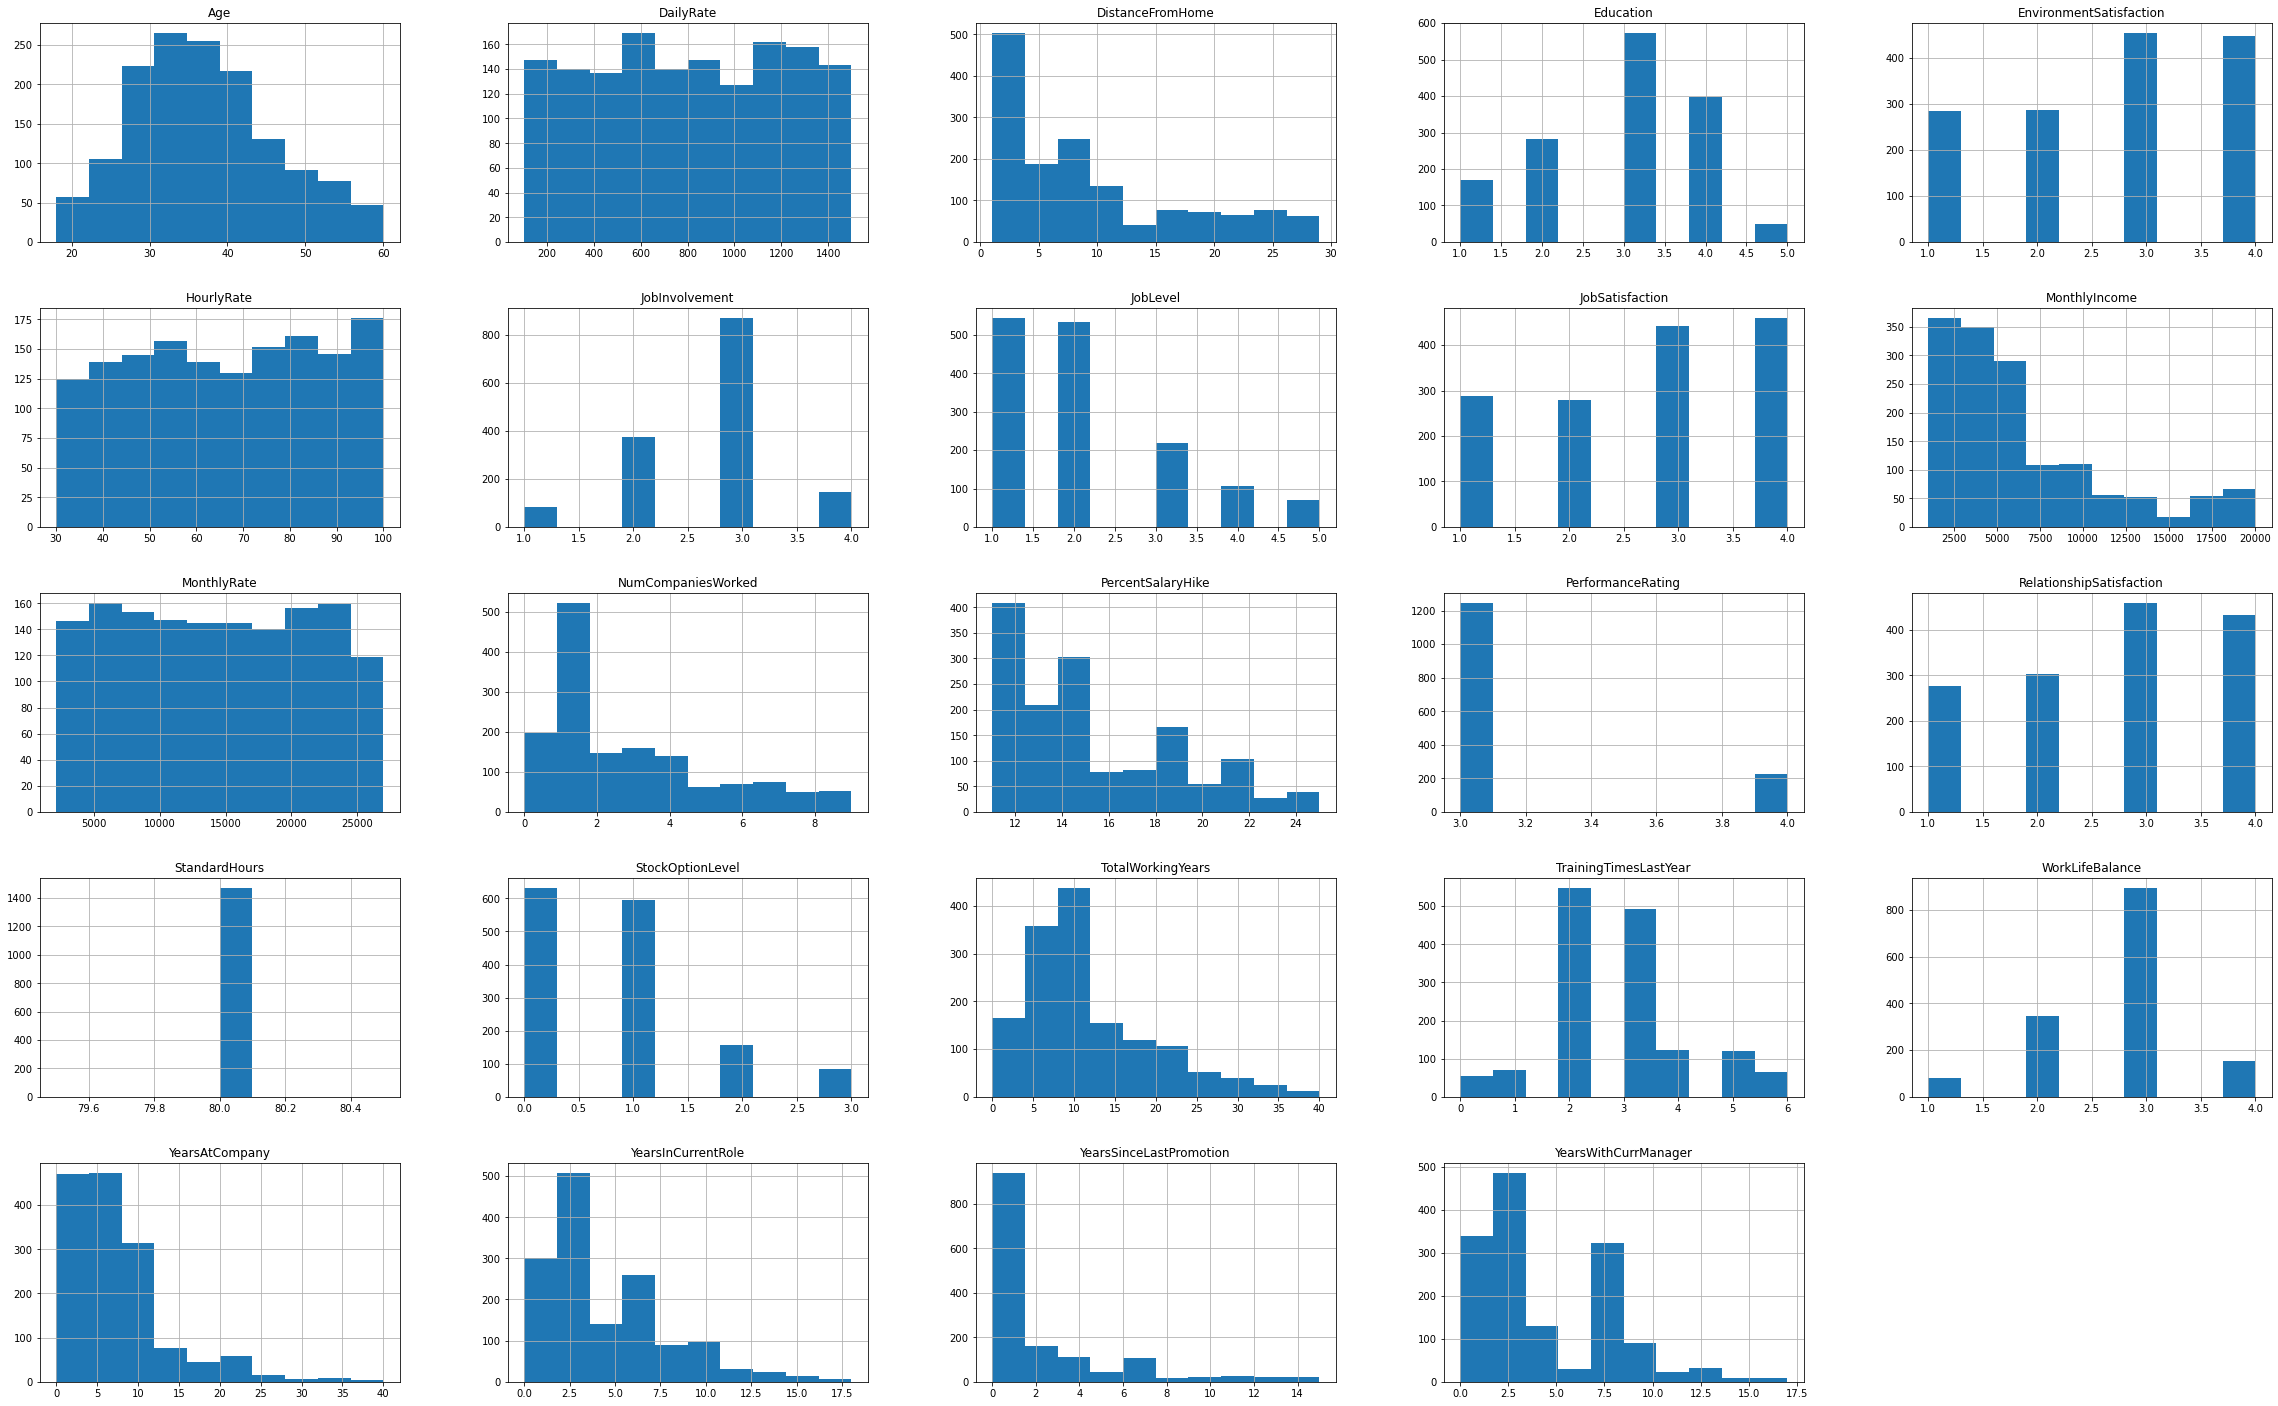

In [9]:
# Quickly Explore the remaining fields
hr.hist(figsize = (40, 25))
plt.show()

While some of the data has normal distribution, like age, other fields do not show many values. After reviewing the historgrams, we will remove the Performance Rating because employees are only rated as 3 or 4, and the Standard hours since everyone has 80.

In [10]:
hr.drop(columns  = ['PerformanceRating', 'StandardHours'], inplace = True)

In [11]:
# Make a new data frame that has only the attrition records and a copy
df_hr_all = hr.copy()
df_attrition = hr.copy()
df_attrition = df_attrition[df_attrition.Attrition == 'Yes']
df_attrition.drop(columns  = ['Attrition'], inplace = True)
df_attrition.shape



(237, 26)

In [12]:
#find the data types that will need to be encoded.
#hr.dtypes

num_list = []

for col in hr:
    if hr[col].dtype == object:
        print(col, hr[col].dtype)
    else:
        
        num_list.append(col)

Attrition object
Gender object
JobRole object
MaritalStatus object
OverTime object


In [13]:
# Print a list of all the numerical fields. These will need scaling.
print(num_list)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
# Add a scaler to transform the numerical columns
scaler = MinMaxScaler()
hr = pd.DataFrame(data = hr)
hr[num_list] = scaler.fit_transform(hr[num_list])

display(hr.head(n=10))




,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,Yes,0.715820,0.000000,0.25,0.333333,Female,0.914286,0.666667,0.25,...,0.000000,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,No,0.126700,0.250000,0.00,0.666667,Male,0.442857,0.333333,0.25,...,0.857143,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,Yes,0.909807,0.035714,0.25,1.000000,Male,0.885714,0.333333,0.00,...,0.285714,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,No,0.923407,0.071429,0.75,1.000000,Female,0.371429,0.666667,0.00,...,0.000000,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,No,0.350036,0.035714,0.00,0.000000,Male,0.142857,0.666667,0.00,...,0.071429,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
5,0.333333,No,0.646385,0.035714,0.25,1.000000,Male,0.700000,0.666667,0.00,...,0.142857,0.666667,0.000000,0.200,0.333333,0.333333,0.175,0.388889,0.200000,0.352941
6,0.976190,No,0.874732,0.071429,0.50,0.666667,Female,0.728571,1.000000,0.00,...,0.642857,0.000000,1.000000,0.300,0.500000,0.333333,0.025,0.000000,0.000000,0.000000
7,0.285714,No,0.899069,0.821429,0.00,1.000000,Male,0.528571,0.666667,0.00,...,0.785714,0.333333,0.333333,0.025,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
8,0.476190,No,0.081603,0.785714,0.50,1.000000,Male,0.200000,0.333333,0.50,...,0.714286,0.333333,0.000000,0.250,0.333333,0.666667,0.225,0.388889,0.066667,0.470588
9,0.428571,No,0.856836,0.928571,0.50,0.666667,Male,0.914286,0.666667,0.25,...,0.142857,0.333333,0.666667,0.425,0.500000,0.333333,0.175,0.388889,0.466667,0.411765


Make a list of the columns to hot encode. Gender and Overtime are binary so they won't need hot encoding. 
Attrition will be the variable that is predicted, so it will not be encoded either. 

In [15]:
# Make a list of the columns to hot encode.
hr_hot_encode = [ 'JobRole','MaritalStatus']

In [16]:
pd.get_dummies(hr, columns = hr_hot_encode, drop_first = True)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,Yes,0.715820,0.000000,0.25,0.333333,Female,0.914286,0.666667,0.25,...,0,0,0,0,0,0,1,0,0,1
1,0.738095,No,0.126700,0.250000,0.00,0.666667,Male,0.442857,0.333333,0.25,...,0,0,0,0,0,1,0,0,1,0
2,0.452381,Yes,0.909807,0.035714,0.25,1.000000,Male,0.885714,0.333333,0.00,...,0,1,0,0,0,0,0,0,0,1
3,0.357143,No,0.923407,0.071429,0.75,1.000000,Female,0.371429,0.666667,0.00,...,0,0,0,0,0,1,0,0,1,0
4,0.214286,No,0.350036,0.035714,0.00,0.000000,Male,0.142857,0.666667,0.00,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,No,0.559771,0.785714,0.25,0.666667,Male,0.157143,1.000000,0.25,...,0,1,0,0,0,0,0,0,1,0
1466,0.500000,No,0.365784,0.178571,0.00,1.000000,Male,0.171429,0.333333,0.50,...,0,0,0,0,0,0,0,0,1,0
1467,0.214286,No,0.037938,0.107143,0.50,0.333333,Male,0.814286,1.000000,0.25,...,0,0,0,1,0,0,0,0,1,0
1468,0.738095,No,0.659270,0.035714,0.50,1.000000,Male,0.471429,0.333333,0.25,...,0,0,0,0,0,0,1,0,1,0


In [17]:
hr = pd.get_dummies(hr, columns= hr_hot_encode, drop_first = True)

In [18]:
hr['Gender'] = hr.Gender.map({'Male' : 0 , 'Female' : 1 })
hr['OverTime'] = hr.OverTime.map({'No' : 0, 'Yes' : 1})


In [19]:
print("Shape After Hot Encoding: Rows, Columns", hr.shape)

Shape After Hot Encoding: Rows, Columns (1470, 35)


In [20]:
#HR table is now transformed and scaled.
display(hr.head(n=10))

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,Yes,0.715820,0.000000,0.25,0.333333,1,0.914286,0.666667,0.25,...,0,0,0,0,0,0,1,0,0,1
1,0.738095,No,0.126700,0.250000,0.00,0.666667,0,0.442857,0.333333,0.25,...,0,0,0,0,0,1,0,0,1,0
2,0.452381,Yes,0.909807,0.035714,0.25,1.000000,0,0.885714,0.333333,0.00,...,0,1,0,0,0,0,0,0,0,1
3,0.357143,No,0.923407,0.071429,0.75,1.000000,1,0.371429,0.666667,0.00,...,0,0,0,0,0,1,0,0,1,0
4,0.214286,No,0.350036,0.035714,0.00,0.000000,0,0.142857,0.666667,0.00,...,0,1,0,0,0,0,0,0,1,0
5,0.333333,No,0.646385,0.035714,0.25,1.000000,0,0.700000,0.666667,0.00,...,0,1,0,0,0,0,0,0,0,1
6,0.976190,No,0.874732,0.071429,0.50,0.666667,1,0.728571,1.000000,0.00,...,0,1,0,0,0,0,0,0,1,0
7,0.285714,No,0.899069,0.821429,0.00,1.000000,0,0.528571,0.666667,0.00,...,0,1,0,0,0,0,0,0,0,0
8,0.476190,No,0.081603,0.785714,0.50,1.000000,0,0.200000,0.333333,0.50,...,0,0,0,1,0,0,0,0,0,1
9,0.428571,No,0.856836,0.928571,0.50,0.666667,0,0.914286,0.666667,0.25,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Prepare the variable that we want to predict
Attrition = hr['Attrition']
hr = hr.drop('Attrition', axis = 1)
Attrition = Attrition.apply(lambda x: 1 if x == 'Yes' else 0)


In [22]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(hr, Attrition, test_size = .2, random_state = 0 )

print("{} samples in Training".format(X_train.shape[0]))
print("{} samples in Testing".format(X_test.shape[0]))


1176 samples in Training
294 samples in Testing


In [23]:
#Accuracy, Precision, Recall calculations

num_records = len(hr)
TP = np.sum(Attrition)
FP = Attrition.count()
TN = 0
FN = 0

accuracy = (TP + TN )/ num_records
precision = TP / (TP + FP)
recall = TP / (TP + FN)
beta = .5
fscore = (1 + beta**2) * ((precision * recall) / ((beta** 2 * precision ) + recall))
print("Accuracy Score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
print("Recall: {:.4f}".format(recall))


Accuracy Score: 0.1612, F-score: 0.1677]
Recall: 1.0000


In [24]:
len(X_test)

294

### Test different models:
<ol>
<li>Logistic Regresssion- Chosen because it is easy to use, and good for binary decisions. It is easy to prevent overfitting.</li>
    <li>SDGC = This is a very popular machine learning algorithim that can be used for decisions.</li>
<li>Ensemble methods- These tend to be more accurate because they are combining multiple algorithims.</li>
</ol>


In [25]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    results = {}
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    #Predictions on the test set:
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:294])
    
    results['accuracy_train'] = accuracy_score(y_train[:294], predictions_train)
    results['accuracy_test'] = accuracy_score(y_test, predictions_test)
    
    #Compute f-score on 294 training samples
    results['f_train'] = fbeta_score(y_train[:294], predictions_train, beta = .5)
    
    #Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = .5)
    
    #Success
    print("{} trained on {} samples".format(learner.__class__.__name__, sample_size ))
    print(results)
    

    
    return results


In [26]:
#Import learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
#Initialize the models
model_A = GaussianNB()
model_B = LogisticRegression()
model_C = SGDClassifier()
model_D = RandomForestClassifier()


test_length = len(y_train)

#Get the results from the learners
results = {}
for model in [model_A, model_B, model_C, model_D]:
    model_name = model.__class__.__name__
    results[model_name] = {}
    results[model_name][test_length] = \
    train_predict(model, test_length, X_train, y_train, X_test, y_test)





GaussianNB trained on 1176 samples
{'accuracy_train': 0.6156462585034014, 'accuracy_test': 0.6326530612244898, 'f_train': 0.2777777777777778, 'f_test': 0.30054644808743175}
LogisticRegression trained on 1176 samples
{'accuracy_train': 0.8979591836734694, 'accuracy_test': 0.8809523809523809, 'f_train': 0.6944444444444445, 'f_test': 0.6589147286821706}
SGDClassifier trained on 1176 samples
{'accuracy_train': 0.8639455782312925, 'accuracy_test': 0.8605442176870748, 'f_train': 0.3333333333333333, 'f_test': 0.5056179775280899}
RandomForestClassifier trained on 1176 samples
{'accuracy_train': 1.0, 'accuracy_test': 0.8435374149659864, 'f_train': 1.0, 'f_test': 0.3529411764705882}


In [28]:
results = pd.DataFrame(results)
display(results)


,GaussianNB,LogisticRegression,SGDClassifier,RandomForestClassifier
1176,"{'accuracy_train': 0.6156462585034014, 'accura...","{'accuracy_train': 0.8979591836734694, 'accura...","{'accuracy_train': 0.8639455782312925, 'accura...","{'accuracy_train': 1.0, 'accuracy_test': 0.843..."


# Model Selection
Logistic Regression was the best fit. 
It has a training accuray of .89 and testing accuracy of .88, and fscore as .69 and .65 respectively.
This will be the model used to predict the attrition of the employees.

In [29]:
Attrition = df_hr_all['Attrition']
df_hr_all['Attrition'] = Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

There were no strong correlations to attrition on their own, nor employee statisfaction. The only one that is really any correlation to attrition is the distance from home. There are correlations between income, job level and total working years. 

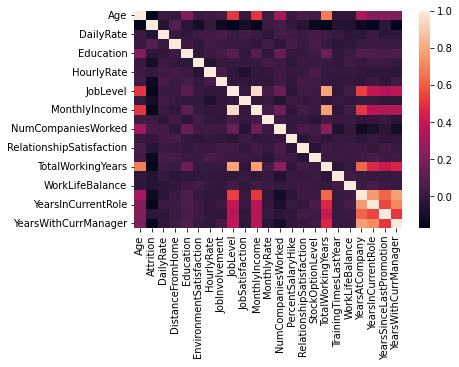

In [30]:
sns.heatmap(df_hr_all.corr());

Looking at some general statistics of attrition:
<ul>
    <li> The average age is 34. </li>
    <li> The average distance from home is 11 miles. </li>
    <li> The average total working years is over 8, with almost 3 years in the current role. </li>

In [31]:
df_attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,15.097046,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,...,3.770294,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,...,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,...,12.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,...,14.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,...,17.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,...,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [32]:
#Save the model for the company to use for future use:
import pickle
filename = 'LR_model_Attrition.sav'
pickle.dump(model, open(filename, 'wb'))


References Used:
<ul>
    <li> Udacity- Finding Donors Machine Learning Project </li>
    <li> https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/ </li>
    
    